In [1]:
#Our Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import PIL.Image as Image
from random import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dense,Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

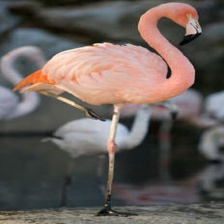

In [2]:
#our image sample
img = Image.open('/content/drive/MyDrive/Birds/Bird Image Classification/FLAMINGO/020.jpg')
img

In [24]:
cv2.imread('/content/drive/MyDrive/Birds/Bird Image Classification/FLAMINGO/020.jpg').shape

(224, 224, 3)

In [3]:
#Generating our train and test(validation data) with Image Data Generator
#we initialize the data generator and we scale the data for the 3 colour channels
#by diving by 255
train = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale= 1/255)

In [4]:
#We create a data from our generator and give it a label
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Bird Image Classification1/train',
                                          target_size=(100,100),
                                          batch_size=3,
                                          class_mode='sparse')

test_dataset = train.flow_from_directory('/content/drive/MyDrive/Bird Image Classification1/test',
                                          target_size=(100,100),
                                          batch_size=3,
                                          class_mode='sparse')

Found 571 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [6]:
#to check our class labels
train_dataset.class_indices

{'AMERICAN GOLDFINCH': 0,
 'BARN OWL': 1,
 'CARMINE BEE-EATER': 2,
 'DOWNY WOODPECKER': 3,
 'EMPEROR PENGUIN': 4,
 'FLAMINGO': 5}

In [28]:
#our labels
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [7]:
#Our model
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dense(6,activation='softmax'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#we train our model and note the validation accuracy and loss
model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
191/191 [==============================] - 269s 1s/step - loss: 1.4388 - accuracy: 0.5079 - val_loss: 0.8781 - val_accuracy: 0.6208
Epoch 2/5
191/191 [==============================] - 184s 964ms/step - loss: 0.4219 - accuracy: 0.8546 - val_loss: 0.5021 - val_accuracy: 0.8583
Epoch 3/5
191/191 [==============================] - 187s 980ms/step - loss: 0.2039 - accuracy: 0.9422 - val_loss: 0.4727 - val_accuracy: 0.8167
Epoch 4/5
191/191 [==============================] - 187s 980ms/step - loss: 0.1411 - accuracy: 0.9545 - val_loss: 0.4972 - val_accuracy: 0.8292
Epoch 5/5
190/191 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9930

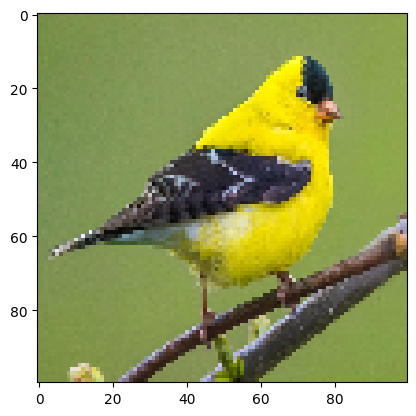

1/1 [==============================] - 0s 46ms/step
[[1. 0. 0. 0. 0. 0.]]
Our bird is an AMERICAN GOLDFINCH


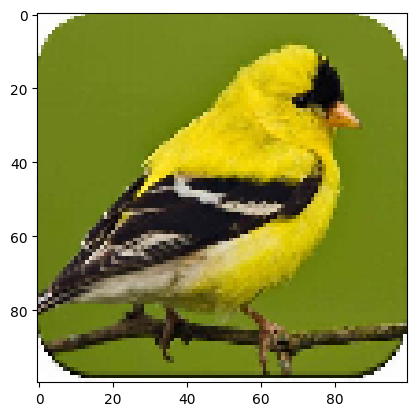

1/1 [==============================] - 0s 41ms/step
[[1. 0. 0. 0. 0. 0.]]
Our bird is an AMERICAN GOLDFINCH


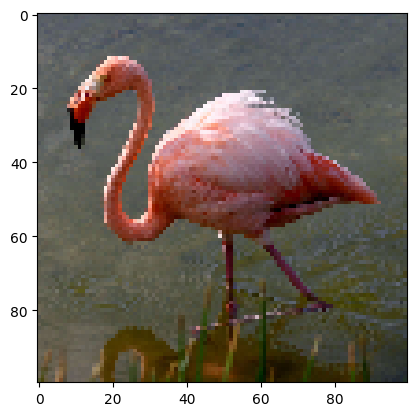

1/1 [==============================] - 0s 56ms/step
[[0. 0. 0. 0. 0. 1.]]
Our bird is a FLAMINGO


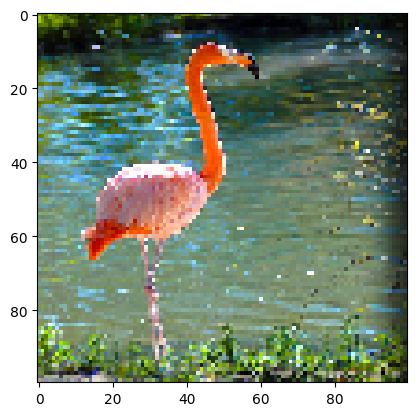

1/1 [==============================] - 0s 227ms/step
[[0. 0. 0. 0. 0. 1.]]
Our bird is a FLAMINGO


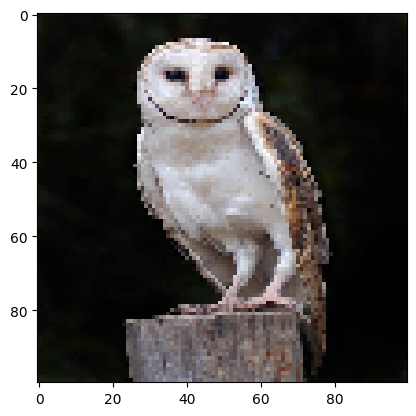

1/1 [==============================] - 0s 55ms/step
[[0. 0. 0. 0. 0. 1.]]
Our bird is a FLAMINGO


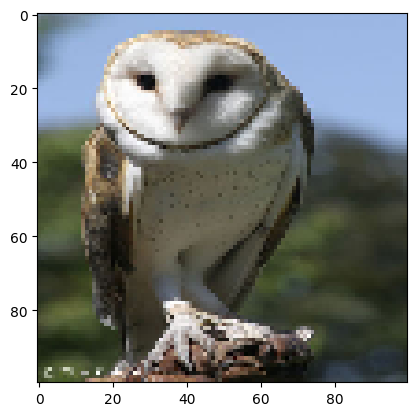

1/1 [==============================] - 0s 72ms/step
[[0. 1. 0. 0. 0. 0.]]
Our bird is a BARN OWL


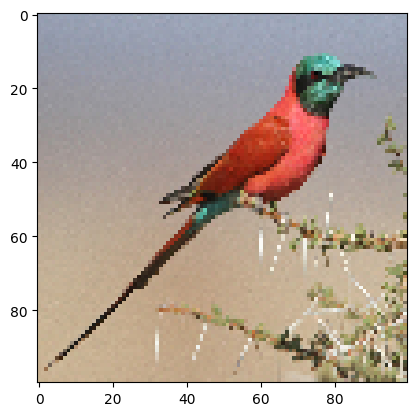

1/1 [==============================] - 0s 93ms/step
[[0. 0. 1. 0. 0. 0.]]
Our bird is a CARMINE BEE-EATER


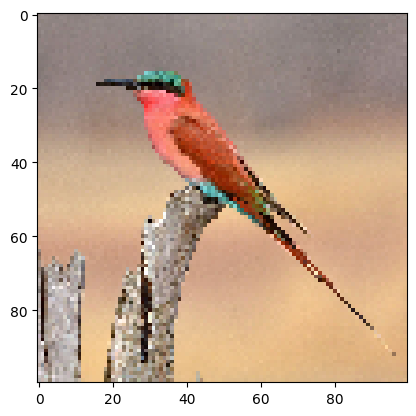

1/1 [==============================] - 0s 37ms/step
[[0. 0. 1. 0. 0. 0.]]
Our bird is a CARMINE BEE-EATER


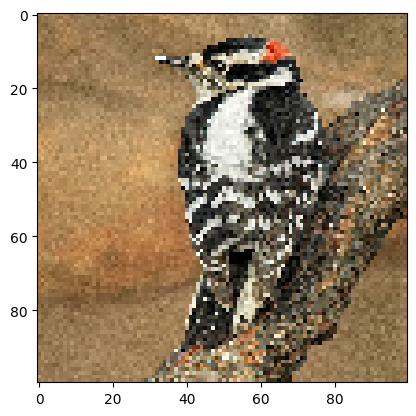

1/1 [==============================] - 0s 37ms/step
[[0. 0. 0. 1. 0. 0.]]
Our bird is a DOWNY WOODPECKER


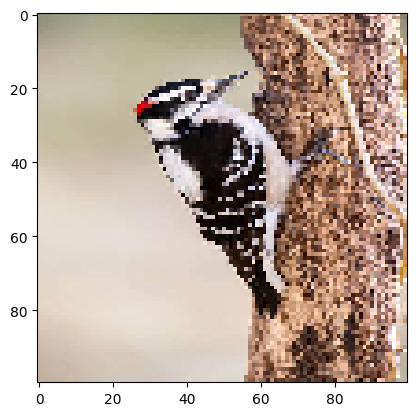

1/1 [==============================] - 0s 37ms/step
[[0. 0. 0. 1. 0. 0.]]
Our bird is a DOWNY WOODPECKER


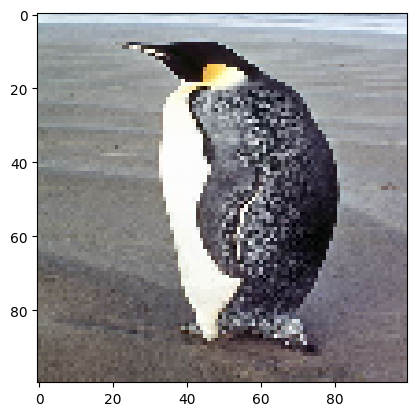

1/1 [==============================] - 0s 36ms/step
[[0. 0. 0. 0. 1. 0.]]
Our bird is an EMPEROR PENGUIN


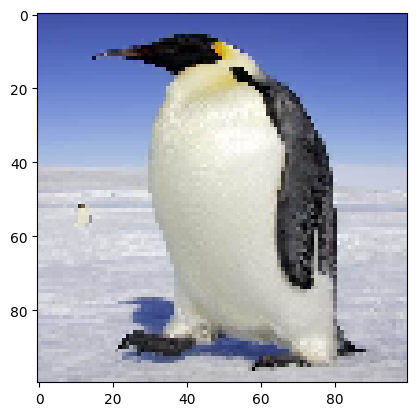

1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 0. 1. 0.]]
Our bird is an EMPEROR PENGUIN


In [18]:
#we read and preprocess our test images and plot our image and our model prediction
path = '/content/drive/MyDrive/my bird'

for i in os.listdir(path):
  img = image.load_img(path+'//'+i, target_size=(100,100))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  pic = model.predict(images)
  print(pic)

  for i in pic:
    if i[0]  == 1:
      print('Our bird is an AMERICAN GOLDFINCH')
    elif i[1] == 1:
      print('Our bird is a BARN OWL')
    elif i[2] == 1:
      print('Our bird is a CARMINE BEE-EATER')
    elif i[3] == 1:
      print('Our bird is a DOWNY WOODPECKER')
    elif i[4] == 1:
      print('Our bird is an EMPEROR PENGUIN')
    elif i[5] == 1:
      print('Our bird is a FLAMINGO')



In [13]:
#our general model prediction array
pred = model.predict(test_dataset)
pred

80/80 [==============================] - 4s 49ms/step


array([[3.7204479e-09, 1.8675217e-09, 9.7382337e-01, 1.6357361e-10,
        8.9967287e-12, 2.6176663e-02],
       [4.4135753e-08, 5.2702189e-09, 9.9999762e-01, 1.4157950e-09,
        1.4129820e-08, 2.4279404e-06],
       [1.0000000e+00, 5.8563037e-12, 7.6461684e-11, 4.0695024e-11,
        3.4530628e-15, 4.1881507e-10],
       ...,
       [1.0000000e+00, 9.9601794e-12, 5.6886701e-10, 6.1870198e-13,
        2.3896347e-13, 3.3919895e-11],
       [1.4251335e-06, 2.0361781e-09, 4.7095609e-03, 5.6193390e-11,
        1.6706482e-13, 9.9528897e-01],
       [3.7179377e-09, 7.3094486e-09, 9.9922061e-01, 9.2193719e-10,
        7.2698953e-08, 7.7927986e-04]], dtype=float32)

In [14]:
#our model Evaluation
#Note the model accuracy
model.evaluate(test_dataset)

80/80 [==============================] - 4s 53ms/step - loss: 0.5739 - accuracy: 0.8458


[0.5739134550094604, 0.8458333611488342]